In [1]:
#from customplot import *

#import sqlite3
%autosave 0
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interp
from scipy.stats import reciprocal, uniform
from numpy import random
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

Autosave disabled


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
def printcfm(y_test,y_pred,title='confusion matrix'):
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title=title)

In [4]:
def plotRoc(y_real, y_pred_prob):
    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_real, y_pred_prob)
    
    # Calculate AUC
    auc = roc_auc_score(y_real, y_pred_prob)

    # Plot ROC curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.text(1, 0.5, "AUC: %3.3f" % (auc), {'color': 'C2', 'fontsize': 18}, va="bottom", ha="right")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


In [5]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [6]:
# Using all phases data and sppliting between train and test
# # train=pd.read_csv('baseProjetoTrainOver.csv', index_col=0)
# # test=pd.read_csv('baseProjetoTest.csv', index_col=0)

# Using phase 1 data and sppliting between train and test
train=pd.read_csv('baseProjetoTrainOverFase1.csv', index_col=0)
test=pd.read_csv('baseProjetoTestFase1.csv', index_col=0)

X_train = train[['ATRIB_MAX1',
         'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
         'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

X_test = test[['ATRIB_MAX1',
         'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
         'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

y_test = test['Perda30']

y_train = train['Perda30']

In [7]:
# Using all Phase 1 database to train and cross-validation

#dfFase1=pd.read_csv('baseProjeto_entradaModelo_fase1.csv', index_col=0)

# X_train = dfFase1[['ATRIB_MAX1',
#         'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
#         'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

# # X_test = dfFase1[['ATRIB_MAX1',
# #         'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
# #         'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

# y_train = dfFase1['Perda30']

# # y_test = dfFase1['Perda30']

In [8]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

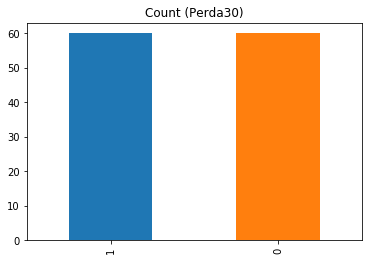

In [9]:
y_train.value_counts().plot(kind='bar', title='Count (Perda30)');

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [11]:
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index)

<br>
## KNeighbors

In [12]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30,
                          p=2, metric='minkowski', metric_params=None, n_jobs=-1)

In [13]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

## Fine-tunning the model.

To turn on Fine-tunning: <br>
define ft = 1

In [14]:
ft = 0

### 1 - Random Search

In [15]:
if ft == 1 :
    param_distributions = {'n_neighbors': range (1, 20, 1), 
                            'weights' : ['uniform', 'distance'],
                           'leaf_size': reciprocal(10, 100)
                           }
    rnd_search_cv = RandomizedSearchCV(knn, param_distributions, n_iter=10, verbose=2, scoring='f1')
    rnd_search_cv.fit(X_train_scaled, y_train)

In [16]:
if ft == 1 :
    print(rnd_search_cv.best_estimator_)
    print(rnd_search_cv.best_score_)
    print(rnd_search_cv.scorer_)
    

### 2 - Grid Search

In [17]:
if ft ==1 :
    parameters = {'n_neighbors': [1,3,4,15,20,30,40], 
              'weights' : ['uniform', 'distance'],
              'leaf_size': [10,30,50,100]
              }
    cv = GridSearchCV(knn, param_grid=parameters, verbose=3, n_jobs=-1, scoring='roc_auc')

In [18]:
if ft ==1 :
    cv.fit(X_train_scaled, y_train)

In [19]:
if ft ==1 :
    print("Best params: ", cv.best_params_,) 
    print("Best Score: %3.3f" %(cv.best_score_))
    y_pred = cv.predict(X_train_scaled)
    final_model =cv.best_estimator_
    print(final_model)

Best params:  {'leaf_size': 10, 'n_neighbors': 3, 'weights': 'distance'}
Best Score: 0.883
KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='distance')

## Regularizating the model

# <font color = 'red'> Fill n_neighbors value </fontcolor>

In [20]:
n_neighbors=2

In [21]:
final_model = KNeighborsClassifier(algorithm='auto', leaf_size=15.97571050781281, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=n_neighbors, p=2,
           weights='uniform')

## Predicting the Classes in Trainning Set

In [22]:
final_model.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=15.97571050781281,
           metric='minkowski', metric_params=None, n_jobs=-1,
           n_neighbors=2, p=2, weights='uniform')

In [23]:
# y_pred = final_model.predict(X_train_scaled)
y_pred = final_model.predict(X_train_scaled)
y_pred_prob = final_model.predict_proba(X_train_scaled)[:,1]

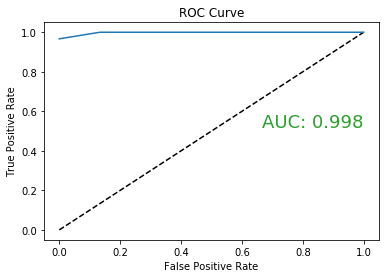

In [24]:
plotRoc(y_train, y_pred_prob)

In [25]:
auc_train = roc_auc_score(y_train, y_pred_prob)

Confusion matrix, without normalization


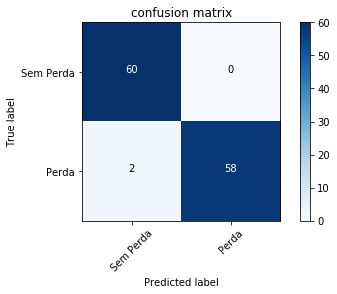

In [26]:
printcfm(y_train,y_pred)

# Evaluating the model with Cross-Validation

In [27]:
y_pred_prob = final_model.predict_proba(X_train_scaled)[:,1]

In [28]:
#cv_scores = cross_val_score(final_model, X_train_scaled, y_train, cv=5, verbose=3, n_jobs=-1)
y_scores = cross_val_predict(final_model, X_train_scaled, y_train, cv=5, verbose=10, method='predict_proba', n_jobs=-1)
#print(y_scores)

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.3s remaining:    4.9s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    4.5s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.6s finished


In [29]:
y_train_pred = cross_val_predict(final_model, X_train_scaled, y_train, cv=3, verbose=3)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


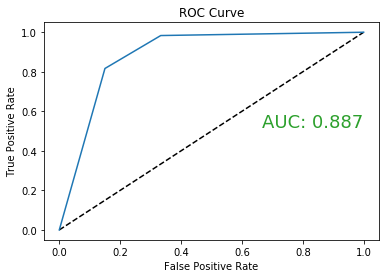

In [30]:
plotRoc(y_train, y_scores)

In [31]:
auc_cv = roc_auc_score(y_train, y_train_pred)
#auc_cv

Confusion matrix, without normalization


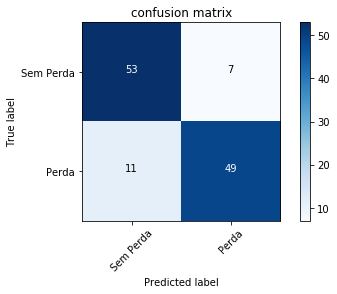

In [32]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [33]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.83      0.88      0.85        60
          1       0.88      0.82      0.84        60

avg / total       0.85      0.85      0.85       120



# Evaluating the model with LOO

In [34]:
loo = LeaveOneOut()
loo.get_n_splits(X_train_scaled)

120

In [35]:
for train, test in loo.split(X_train_scaled):
     print("%s %s" % (train, test))

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119] [0]
[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119] [1]
[  0   1   3   4   5   6

In [36]:
cv=loo

In [37]:
y_scores = cross_val_predict(final_model, X_train_scaled, y_train, cv=cv, verbose=10, method='predict_proba', n_jobs=-1)

[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    8.6s finished


In [38]:
y_train_pred = cross_val_predict(final_model, X_train_scaled, y_train, cv=cv, verbose=10)
# hack to work around issue #9589 in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]
# print(y_scores)
# print(np.mean(y_scores))

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   12.8s finished


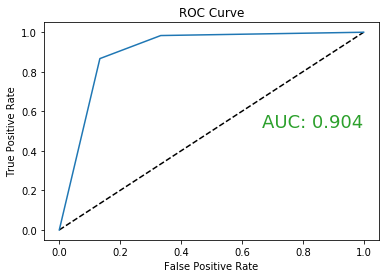

In [39]:
plotRoc(y_train, y_scores)

In [40]:
auc_LoO = roc_auc_score(y_train, y_scores)
#auc_LoO

Confusion matrix, without normalization


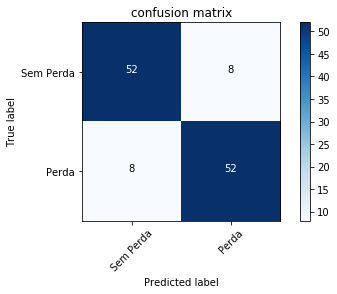

In [41]:
printcfm(y_train, y_train_pred, title='confusion matrix')

In [42]:
print(classification_report(y_train, y_train_pred))

             precision    recall  f1-score   support

          0       0.87      0.87      0.87        60
          1       0.87      0.87      0.87        60

avg / total       0.87      0.87      0.87       120



# Evaluating the model with Repeated K fold

In [43]:
def perform_repeated_cv(X, y , model):
    #set random seed for repeatability
    random.seed(1)

    #set the number of repetitions
    n_reps = 45

    # perform repeated cross validation
    accuracy_scores = np.zeros(n_reps)
    precision_scores=  np.zeros(n_reps)
    recall_scores =  np.zeros(n_reps)
    auc_scores =  np.zeros(n_reps)
    #result_pred = pd.DataFrame(index=np.arange(30))
    result_pred = y
    
    ##############################
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    fig = plt.figure(figsize=(20, 10))
    ###############################

    for u in range(n_reps):

        #randomly shuffle the dataset
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
#         X = X[indices]
#         y = y[indices] #dataset has been randomly shuffled
        X = X.iloc[indices]
        y = y.iloc[indices] #dataset has been randomly shuffled

        #initialize vector to keep predictions from all folds of the cross-validation
        y_predicted = np.zeros(y.shape)
        probas = np.zeros(y.shape)

        #perform 10-fold cross validation
        kf = KFold(n_splits=4 , random_state=142)
        for train, test in kf.split(X):

            #split the dataset into training and testing
#             X_train = X[train]
#             X_test = X[test]
#             y_train = y[train]
#             y_test = y[test]
            X_train = X.iloc[train]
            X_test = X.iloc[test]
            y_train = y.iloc[train]
            y_test = y.iloc[test]

#             #standardization
#             scaler = preprocessing.StandardScaler().fit(X_train)
#             X_train = scaler.transform(X_train)
#             X_test = scaler.transform(X_test)

            #train model
            clf = model
            clf.fit(X_train, y_train)

            #make predictions on the testing set
            y_predicted[test] = clf.predict(X_test)
#            print(y_predicted[test],y_test,type(y_predicted))
            #y_train_pred_array = np.append(y_train_pred_array,y_train_pred)
#            print(result_pred)



            
            ###############################plot
#             probas_ = clf.predict_proba(X_test)
            probas[test] = clf.predict_proba(X_test)[:, 1]
#             print(probas[test], type(probas), probas.size)
         
#        print(y,y_predicted)
        #result_pred = y
        df_pred = pd.DataFrame(y_predicted, index=y.index,columns=[u])
        result_pred = pd.concat([result_pred, df_pred], axis=1) 
        

                
    
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y, probas)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        #roc_auc = auc(fpr, tpr) - Change to obtain AUC by predict proba
#06/11 - 18:39       roc_auc = roc_auc_score(y, y_predicted)
        roc_auc = roc_auc_score(y, probas) #06/11 - 18:39
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
        label='ROC fold %d (AUC = %0.2f)' % (u, roc_auc))

            
            ################################

        #record scores
        accuracy_scores[u] = accuracy_score(y, y_predicted)
        precision_scores[u] = precision_score(y, y_predicted)
        recall_scores[u]  = recall_score(y, y_predicted)
#06/11 - 18:39        auc_scores[u] = roc_auc_score(y, y_predicted)
        auc_scores[u] = roc_auc_score(y, probas) #06/11 - 18:39
    ###############################plot
#    print(result_pred)
    
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
    label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
#     mean_auc = auc(mean_fpr, mean_tpr)
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)


    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    #plt.legend(loc="lower right")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
               fancybox=True, shadow=True, ncol=5)
    plt.show()
    ################################
    
    #return all scores
    return accuracy_scores, precision_scores, recall_scores, auc_scores, result_pred

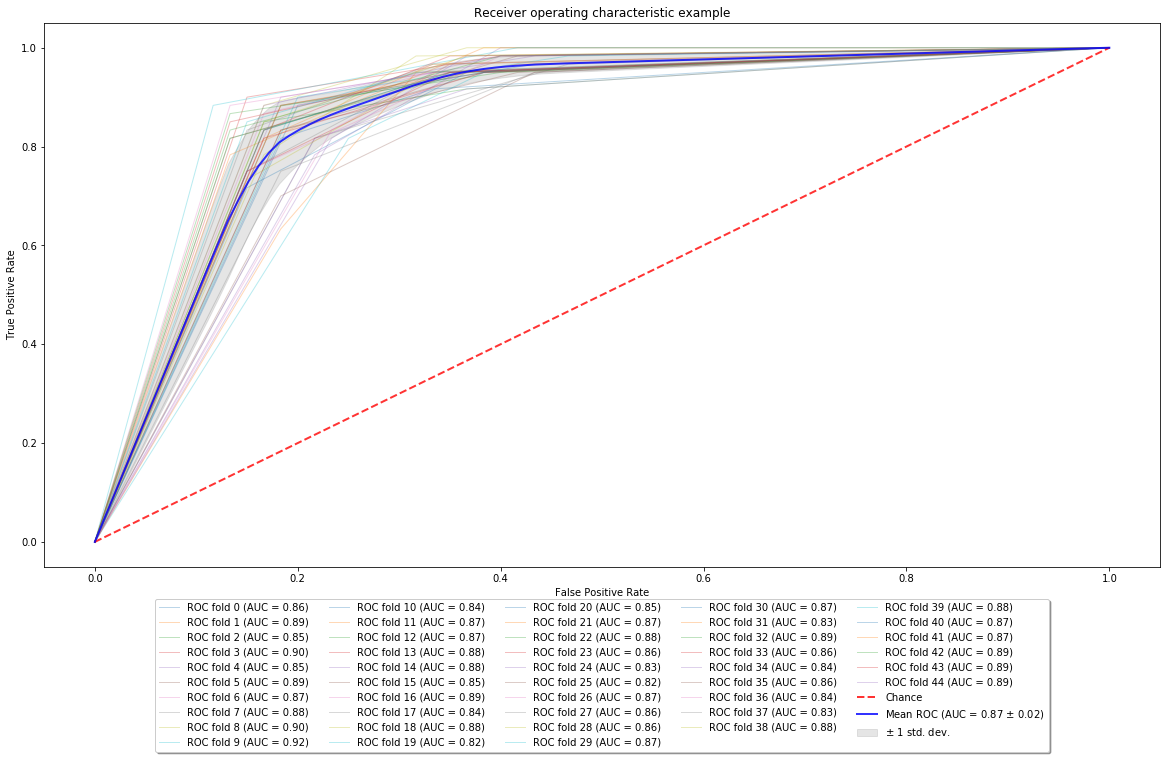

In [44]:
accuracy_scores, precision_scores, recall_scores, auc_scores, result_pred = perform_repeated_cv(X_train_scaled, y_train, final_model)

In [45]:
# print(accuracy_scores, accuracy_scores.size)

In [46]:
# print(precision_scores, recall_scores)

In [47]:
print(auc_scores, auc_scores.size)

[0.86 0.89 0.85 0.9  0.85 0.89 0.87 0.88 0.9  0.92 0.84 0.87 0.87 0.88
 0.88 0.85 0.89 0.84 0.88 0.82 0.85 0.87 0.88 0.86 0.83 0.82 0.87 0.86
 0.86 0.87 0.87 0.83 0.89 0.86 0.84 0.86 0.84 0.83 0.88 0.88 0.87 0.87
 0.89 0.89 0.89] 45


No handles with labels found to put in legend.


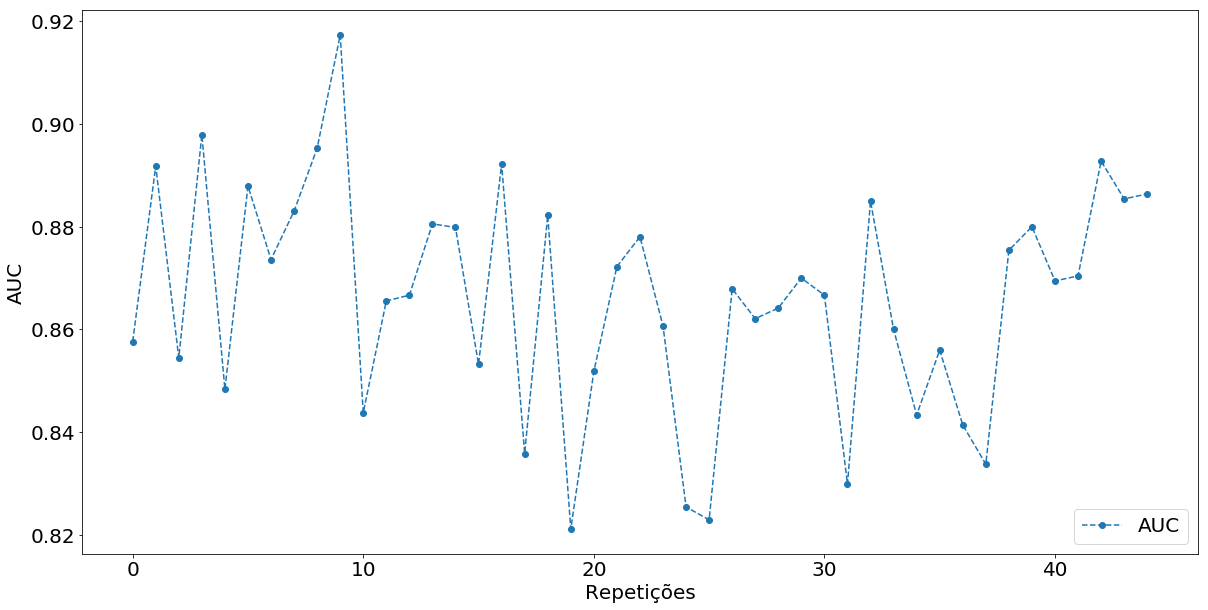

In [48]:
fig = plt.figure(figsize=(20, 10))
plt.plot(auc_scores, '--o')
plt.legend(loc='lower right')
plt.ylabel('AUC', fontsize=20);
plt.xlabel('Repetições', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=20);
plt.tick_params(axis='both', which='minor', labelsize=18);
#plt.xlim([0, 18])
#plt.ylim([0.5, 1])
plt.legend(('AUC', 'AUC'), loc='lower right', prop={'size': 20})
plt.show()

In [49]:
print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(auc_scores), np.std(auc_scores)))

Accuracy: 0.87 (+/- 0.02)


In [50]:
#result_pred.to_csv('result_kfold_KNN.csv', encoding='utf-8')

# Predicting the Classes in Test Set

In [51]:
final_model.fit(X_train_scaled, y_train)
y_pred = final_model.predict(X_test_scaled)
y_pred_prob = final_model.predict_proba(X_test_scaled)[:,1]
#y_pred = final_model.predict(X_test)

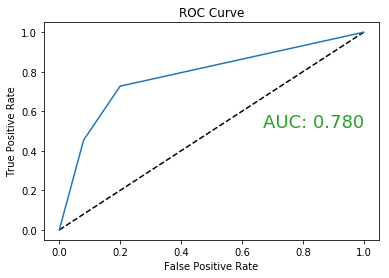

In [52]:
plotRoc(y_test, y_pred_prob)

In [53]:
auc_test = roc_auc_score(y_test, y_pred_prob)

Confusion matrix, without normalization


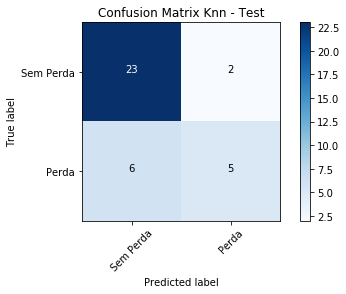

In [54]:
printcfm(y_test,y_pred,'Confusion Matrix Knn - Test')

In [55]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.79      0.92      0.85        25
          1       0.71      0.45      0.56        11

avg / total       0.77      0.78      0.76        36



## Results

In [56]:
print("k: ", n_neighbors)
print("AUC Train: %3.3f" % (auc_train))
print("AUC Repeated k-fold: %0.2f (+/- %0.2f)" % (np.mean(auc_scores), np.std(auc_scores)))
print("AUC LoO: %3.3f" % (auc_LoO))
print("AUC test: %3.3f" % (auc_test))
print("AUC cv: %3.3f" % (auc_cv))

k:  2
AUC Train: 0.998
AUC Repeated k-fold: 0.87 (+/- 0.02)
AUC LoO: 0.904
AUC test: 0.780
AUC cv: 0.850


# Draft

In [57]:
#  validation curve off
vc = 0

In [58]:
if vc == 1:
    #X=np.concatenate((X_train_scaled,X_test_scaled),axis=0)
    X=X_train_scaled
    # print(X)
    #y=np.append(y_train,y_test)
    y=y_train
    # print(y)
    param_range = [1,3,4,15,20,40]

In [59]:
if vc == 1:
    print(__doc__)

    plt.rcParams["figure.figsize"] = (20,10)
    plt.rcParams.update({'font.size': 20})
    plt.grid(True,which="both", linestyle='--')

    train_scores, test_scores = validation_curve(
        final_model, X, y, param_name="n_neighbors", param_range=param_range,
        cv=10, scoring="roc_auc", n_jobs=1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with Knn")
    plt.xlabel("n_neighbors")
    plt.ylabel("AUC")
    #plt.ylim(0.8, 1.1)
    #plt.xlim(-1, 22)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

In [60]:
if vc == 1:
    print(__doc__)
    
    #loo = LeaveOneOut()
    #cv=loo
    cv = 10
    
    plt.rcParams["figure.figsize"] = (20,10)
    plt.rcParams.update({'font.size': 20})
    plt.grid(True,which="both", linestyle='--')

    train_scores, test_scores = validation_curve(
        final_model, X, y, param_name="n_neighbors", param_range=param_range,
        cv=loo, scoring="accuracy", n_jobs=1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with Knn")
    plt.xlabel("n_neighbors")
    plt.ylabel("Accuracy")
    #plt.ylim(0.8, 1.1)
    #plt.xlim(-1, 22)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

In [61]:
# # from sklearn.tree import DecisionTreeRegressor
# from yellowbrick.model_selection import ValidationCurve

# # # Load a regression dataset
# # data = load_data('energy')

# # # Specify features of interest and the target
# # targets = ["heating load", "cooling load"]
# # features = [col for col in data.columns if col not in targets]
# param_range = [1,3,4,15,20,30,50,100]

# viz = ValidationCurve(
#     final_model, param_name="n_neighbors", param_range=param_range,
#     cv=3, scoring="roc_auc", n_jobs=1)

# # Fit and poof the visualizer
# viz.fit(X, y)
# viz.poof()

## Export results

In [62]:
export = 1

In [63]:
knn_df = pd.concat([X_test, y_test], axis=1)  # features and actual
knn_df['Predicted'] = y_pred  # creates a predicted column to the complete_df, now you'll have features, actual, and predicted
knn_df

,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,Perda30,Predicted
65,0.95,0.00,0.5500,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0
97,0.27,262.80,1.0000,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1
47,0.95,350.00,1.7700,1,1,0,0,0,0,0,1,1,1,0,1,0,1,0,0
55,0.95,145.00,1.2900,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0
19,0.95,0.00,1.2774,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0
92,0.81,25.00,0.5200,0,1,0,1,1,1,0,0,1,1,1,1,1,1,0,0
54,0.07,1000.00,1.0100,0,1,0,1,0,1,1,0,1,1,1,1,0,1,0,0
64,0.94,201.00,0.3900,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0
111,0.05,1000.00,0.4400,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1
20,0.95,40.00,1.1000,1,0,0,1,1,0,0,0,1,1,1,1,1,1,1,0


In [64]:
if export == 1:
    knn_df.to_csv('knn_results.csv', encoding='utf-8')